In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'abalone.data'
ab_data = pd.read_csv(data_path, sep=',', header=None)
ab_data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings' ]

In [3]:
ab_data

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


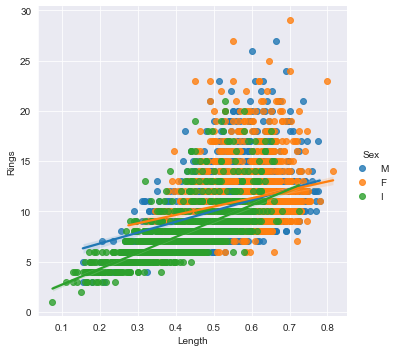

In [4]:
lenvrings = sns.lmplot(x="Length",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Length", "Rings")

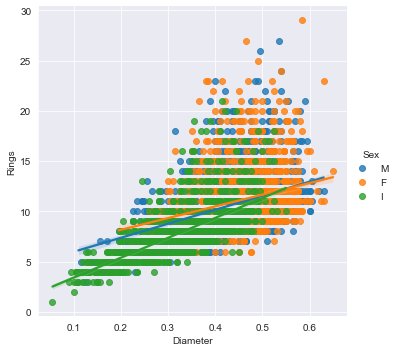

In [5]:
diametervrings = sns.lmplot(x="Diameter",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Diameter", "Rings")

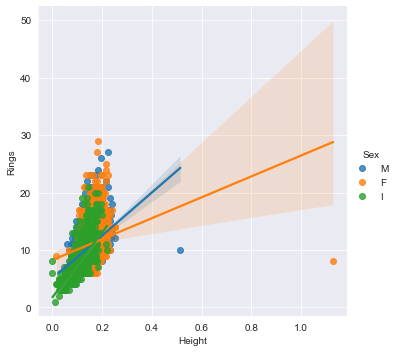

In [6]:
heightvrings = sns.lmplot(x="Height",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Height", "Rings")

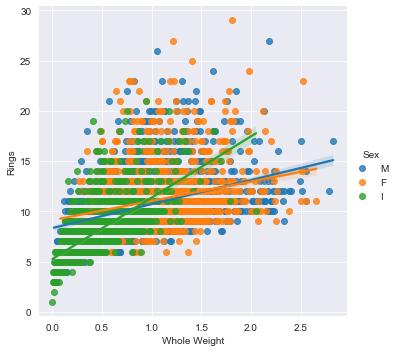

In [7]:
wholeweightvrings = sns.lmplot(x="Whole Weight",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Whole Weight", "Rings")

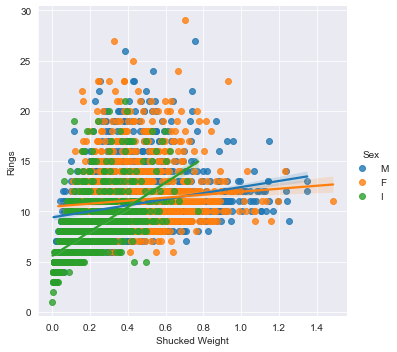

In [8]:
shuckedweightvrings = sns.lmplot(x="Shucked Weight",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Shucked Weight", "Rings")

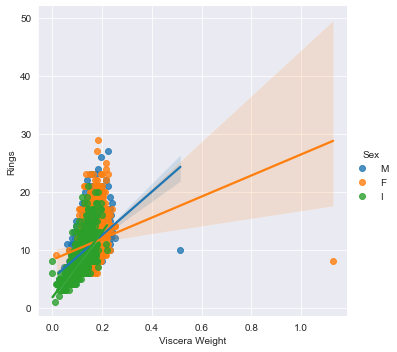

In [9]:
visceraweightvrings = sns.lmplot(x="Height",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Viscera Weight", "Rings")

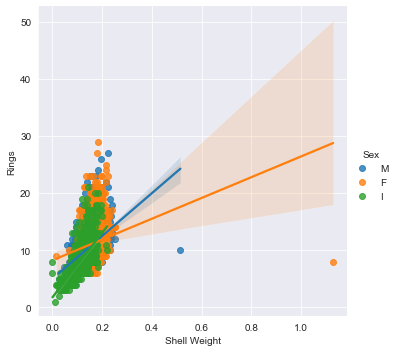

In [10]:
shellweightvrings = sns.lmplot(x="Height",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Shell Weight", "Rings")

Data is visualized, 3 ways to proceed.

Potential Ways to Predict Rings

1. Multivariate Regression using all numerical variables (excluding rings)
2. KNR of a certain size
3. Average of linear regressions (create linear regression using each numerical value, then average the approximate rings)
4. Neural network (need to figure out what type and node placement)

---

# Multivariate Linear Regression using numerical variables

In [11]:
from sklearn.linear_model import LinearRegression
X_lin = ab_data[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']]
y_lin = ab_data['Rings']
lin_regr = LinearRegression()
lin_regr.fit(X_lin, y_lin)


LinearRegression()

In [12]:
print ( "Our coefficient of determination, R^2, is " + str(lin_regr.score(X_lin, y_lin)))

Our coefficient of determination, R^2, is 0.5276299399919837


In [13]:
lin_regr.coef_

array([ -1.57189738,  13.36091617,  11.82607248,   9.24741445,
       -20.21391319,  -9.82967548,   8.57624241])

I would try to visualize the model, but with 7 inputs, I'm not sure if a scatterplot could do it justice. Maybe a 7 dimensional scatterplot, but my visual model for scatterplots kinda goes out the window with 5 dimensions. Also, this model isn't amazing as shown by the R^2 value and the coefficients. As a reminder, our predictors were
1. Length
2. Diameter
3. Height
4. Whole
5. Shucked Weight
6. Viscera Weight
7. Shell Weight

and in the graphs, I noticed that each correlation was approximately positive. This doesn't match the coeffcients that are seen here, meaning that the linear regression is an improper model.


***

# Multivariate Polynomial Regression using numerical variables

The below code is an attempt at doing multivariate polynomial regression, but it kind of fails pretty bad. At least the graph is incredibly funny as you get to higher and higher degrees.



In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(X_lin)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_lin)

LinearRegression()

In [15]:
y_pred = poly_reg_model.predict(poly_features)
y_pred

array([ 8.33593624,  7.30102468, 10.98390387, ..., 11.18344302,
        9.57892623, 11.4819268 ])

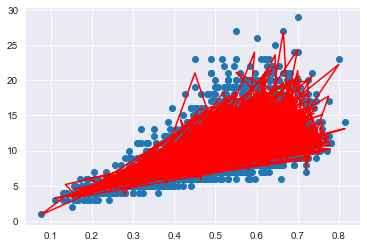

In [16]:
plt.scatter(X_lin['Length'], y_lin)
plt.plot(X_lin['Length'], y_pred, c="red")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_multi, y_multi = ab_data[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']], ab_data["Rings"]
poly_multi = PolynomialFeatures(degree=2, include_bias=False)
poly_features_multi = poly.fit_transform(X_multi)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y_multi, test_size=0.3, random_state=42)

In [18]:
poly_reg_model_multi = LinearRegression()
poly_reg_model_multi.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

1.890121104370834

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

2.2192193506637925

In [20]:
poly_reg_model_multi.coef_

array([-8.74628734e+02,  8.16638004e+02,  6.05988459e+02,  5.22578347e+02,
       -3.50560589e+02, -4.51312316e+01, -1.25237205e+03,  8.12369351e+03,
       -8.00614817e+03,  2.41555056e+03,  3.04314134e+03,  2.87562706e+03,
       -2.42996869e+04, -9.78492516e+03,  1.36475401e+03, -1.72815086e+04,
       -4.47161895e+03, -1.80659529e+03,  2.82540452e+04,  1.20150496e+04,
        6.67794716e+03, -2.03637005e+04,  8.80301664e+03,  1.98021132e+04,
        4.95748894e+04,  1.72923336e+03, -1.48616108e+03,  1.33601573e+03,
        1.03919771e+03,  1.49571549e+03,  1.29877965e+03, -1.10743148e+04,
       -8.26441995e+03, -3.45388136e+03, -1.25564226e+03,  9.77912823e+03,
       -6.88675835e+04, -1.81814777e+05, -7.75181440e+04,  6.67791038e+04,
        1.79986803e+05,  1.24528322e+05,  6.48135979e+04,  4.57331767e+05,
        2.01319807e+05, -2.18526805e+05, -3.81616708e+05, -1.90025955e+05,
        2.58094954e+04, -6.49346260e+03,  2.08241198e+04,  1.83681958e+05,
       -1.86700853e+05,  

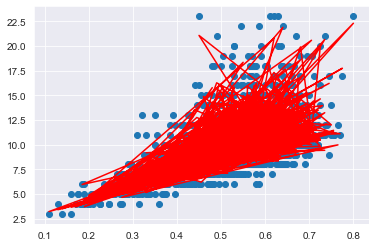

In [21]:
plt.scatter(X_test['Length'], y_test)
plt.plot(X_test['Length'], poly_reg_y_predicted, c="red")
plt.show()

***
# K Neighbors Regressor

This is a K Neighbors Regressor. It iterates through 1 neighbor to 100 neighbors to find the best score. However, the maximum score I get is for 25 neighbors with a score of 0.5533072843007265, so it's slightly better than the linear regression, but still pretty bad.

In [22]:
from sklearn.neighbors import KNeighborsRegressor
KNRlist = []
for i in range(1,100):
    KNNreg = KNeighborsRegressor(n_neighbors=i)
    KNNreg.fit(X_train, y_train)
    KNRlist.append(KNNreg.score(X_test, y_test))

print ("The largest score is " + str(max(KNRlist)) + " at index number " + str(KNRlist.index(max(KNRlist))))

The largest score is 0.5533072843007265 at index number 24


***


# Neural Network
This note is just for personal use, but maybe it'll be of help to you too. Tensorflow

In [38]:
from sklearn.neural_network import MLPRegressor
NNmodel = MLPRegressor(hidden_layer_sizes=(56, 28, 14, 7), max_iter= 10000000)
NNmodel.fit(X_train, y_train)
predictions = NNmodel.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, predictions)))
print(NNmodel.score(X_test, y_test))

2.1253796917475114
0.5551515785725063


This seems to be a better regressor than anything else above. It's still not particularly amazing, but the mean squared error is similar to the other methods while the coefficient of coefficient of determination, R^2, is higher than anything else (though I'm not sure it's significant statistically.) Either way, I know that the task of getting these numbers where I want them is far from done, but for an introduction, it seems fine.

To look at if future me picks this up - X_train should have the gender of the abalone omitted for the regression, make another test-train split because you're not getting much better with the data you have right now.